### 공분산

In [17]:
import pandas as pd

In [18]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [19]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [20]:
df.sort_values(by='body_shape')

,calory,breakfast,lunch,dinner,exercise,body_shape
2,3500,2,2,1,0,Fat
4,5000,2,2,2,0,Fat
7,4000,2,2,2,0,Fat
9,3000,1,2,1,1,Fat
1,2800,1,1,1,1,Normal
6,3000,1,0,1,1,Normal
8,2600,0,2,0,0,Normal
0,1200,1,0,0,2,Skinny
3,1400,0,1,0,3,Skinny
5,1300,0,0,1,2,Skinny


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calory,10.0,2780.0,1231.800850,1200.0,1700.00,2900.0,3375.00,5000.0
breakfast,10.0,1.0,0.816497,0.0,0.25,1.0,1.75,2.0
lunch,10.0,1.2,0.918937,0.0,0.25,1.5,2.00,2.0
dinner,10.0,0.9,0.737865,0.0,0.25,1.0,1.00,2.0
exercise,10.0,1.0,1.054093,0.0,0.00,1.0,1.75,3.0


In [22]:
Y = df['body_shape']
X = df.drop(['body_shape'],axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
pd.DataFrame(X_std,columns=X.columns)

,calory,breakfast,lunch,dinner,exercise
0,-1.352058,0.000000,-1.376494,-1.285714,1.0
1,0.017115,0.000000,-0.229416,0.142857,0.0
2,0.616128,1.290994,0.917663,0.142857,-1.0
3,-1.180911,-1.290994,-0.229416,-1.285714,2.0
4,1.899727,1.290994,0.917663,1.571429,-1.0
5,-1.266485,-1.290994,-1.376494,0.142857,1.0
6,0.188261,0.000000,-1.376494,0.142857,0.0
7,1.043994,1.290994,0.917663,1.571429,-1.0
8,-0.154032,-1.290994,0.917663,-1.285714,-1.0
9,0.188261,0.000000,0.917663,0.142857,0.0


### Covariance Metrix of Features

In [30]:
import numpy as np

In [29]:
features = X_std.T
covarinace_metrix = np.cov(features)
pd.DataFrame(covarinace_metrix,index = X.columns,columns=X.columns)

,calory,breakfast,lunch,dinner,exercise
calory,1.111111,0.883797,0.767824,0.893766,-0.931798
breakfast,0.883797,1.111111,0.493624,0.819679,-0.717219
lunch,0.767824,0.493624,1.111111,0.400567,-0.764719
dinner,0.893766,0.819679,0.400567,1.111111,-0.634921
exercise,-0.931798,-0.717219,-0.764719,-0.634921,1.111111


##### 고유벡터와 고유값 with 공분산 행렬

In [36]:
eig_vals, eig_vecs = np.linalg.eig(covarinace_metrix)
print('##고유값##','\n',eig_vals,'\n\n','##고유벡터##','\n',eig_vecs)

##고유값## 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ] 

 ##고유벡터## 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [38]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

#### project data into selected eigen vector

In [40]:
projected_x = X_std.dot(eig_vecs.T[0])  # 벡터 내적하기 

In [45]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rumbi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

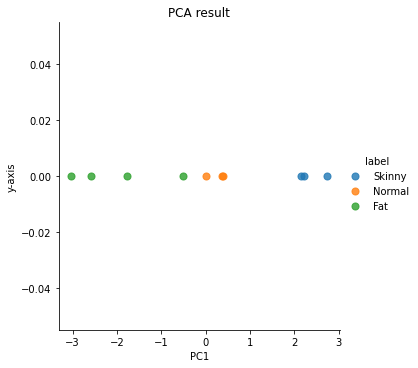

In [49]:
sns.lmplot('PC1','y-axis',data = result,fit_reg=False, scatter_kws={'s':50},hue='label')
plt.title('PCA result')

### sklearn PCA 라이브러리 이용

In [48]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=1)

In [58]:
pca_x = pca.fit_transform(X_std)
print(pca_x,'\n', result['PC1'])

[[-2.22600943]
 [-0.0181432 ]
 [ 1.76296611]
 [-2.73542407]
 [ 3.02711544]
 [-2.14702579]
 [-0.37142473]
 [ 2.59239883]
 [-0.39347815]
 [ 0.50902498]] 
 0   -2.226009
1   -0.018143
2    1.762966
3   -2.735424
4    3.027115
5   -2.147026
6   -0.371425
7    2.592399
8   -0.393478
9    0.509025
Name: PC1, dtype: float64


C:\Users\rumbi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

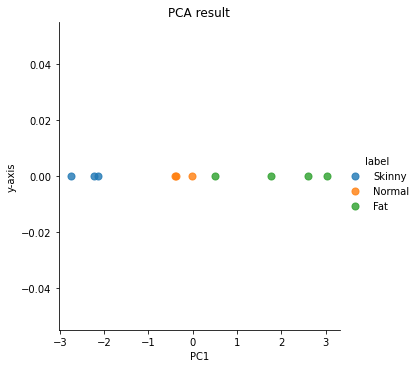

In [59]:
result = pd.DataFrame(pca_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

sns.lmplot('PC1','y-axis',data = result,fit_reg=False, scatter_kws={'s':50},hue='label')
plt.title('PCA result')

### TASK

- 붓꽃데이터 데이터 전처리 
- train:test = 8:2
- 차원축소 (n_components=2)
- RandomForest 이용해서 학습
- 차원축소 하지 않은 것과 비교를 accuracy로 평가 

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [9]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
colunms = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=colunms)
irisDF['target'] = iris.target

In [12]:
print(irisDF.shape)  #0 : setosa, 1:versicolor , 2:virginica
irisDF.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


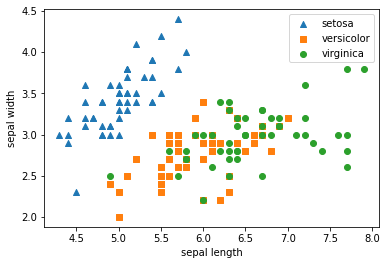

In [14]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data= irisDF[irisDF.target == i]['sepal_length']
    y_axis_data = irisDF[irisDF.target==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker= marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()